# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#Samples are uniformly distributed over the half-open interval [low, high) (includes low, but excludes high)
#size : Output shape: int or tuple of ints, optional
# test size = 15 AND 150 , actual size 1500, reduces to about 600 unqiue values
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cityCount=len(cities)

In [3]:
#Prepare containers (City	Cloudiness	Country	Date	Humidity	Lat	Lng	Max Temp	Wind Speed)
rcities=[]
rlats=[]
rlngs=[]
clouds=[]
countries=[]
dates=[]
humidities=[]
mxTemps=[]
winds=[]
degs=[]
# Additional fields 
wdds=[]
markers=[]
colors=[]
sortPrio=[]

In [4]:
### Perform API Calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"  # not metric
appid = api_key
query_url = url+"appid="+api_key+"&units="+units+"&q="
cityCounter=1
for city in cities:
    try:
        city_query_url = query_url+city 
        response = requests.get(city_query_url).json()
        rcities.append(response['name'])
        rlats.append(response['coord']['lat'])
        rlngs.append(response['coord']['lon'])
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        mxTemps.append(response['main']['temp_max'])
        winds.append(response['wind']['speed'])
        degs.append(response['wind']['deg'])       
      
        print("Processing Record "+str( cityCounter)+ " of " +str(cityCount)+" | " + city)
        cityCounter= cityCounter+1
    except:
        print('Skipped '+city)


Processing Record 1 of 627 | chuy
Processing Record 2 of 627 | jacareacanga
Processing Record 3 of 627 | mataura
Processing Record 4 of 627 | dikson
Skipped illoqqortoormiut
Processing Record 5 of 627 | jamestown
Processing Record 6 of 627 | teya
Processing Record 7 of 627 | busselton
Processing Record 8 of 627 | atuona
Processing Record 9 of 627 | ushuaia
Skipped nizhneyansk
Processing Record 10 of 627 | uvalde
Processing Record 11 of 627 | kupang
Processing Record 12 of 627 | lesozavodsk
Skipped addi ugri
Processing Record 13 of 627 | zhuhai
Processing Record 14 of 627 | barrow
Processing Record 15 of 627 | chokurdakh
Processing Record 16 of 627 | hilo
Processing Record 17 of 627 | punta arenas
Processing Record 18 of 627 | butaritari
Processing Record 19 of 627 | hami
Processing Record 20 of 627 | kapaa
Processing Record 21 of 627 | nouakchott
Processing Record 22 of 627 | sistranda
Processing Record 23 of 627 | bredasdorp
Skipped barentsburg
Processing Record 24 of 627 | norman wel

Processing Record 196 of 627 | victoria
Processing Record 197 of 627 | diffa
Processing Record 198 of 627 | vila velha
Processing Record 199 of 627 | ribeira grande
Processing Record 200 of 627 | rio gallegos
Processing Record 201 of 627 | hasaki
Skipped paradwip
Processing Record 202 of 627 | labuhan
Processing Record 203 of 627 | gravdal
Processing Record 204 of 627 | kokkola
Processing Record 205 of 627 | waverly
Processing Record 206 of 627 | varzea grande
Skipped gorno-chuyskiy
Processing Record 207 of 627 | coquimbo
Processing Record 208 of 627 | namibe
Skipped marcona
Skipped stantsiya gorchakovo
Processing Record 209 of 627 | constitucion
Skipped amderma
Skipped umzimvubu
Processing Record 210 of 627 | lasa
Processing Record 211 of 627 | gunjur
Processing Record 212 of 627 | paracuru
Processing Record 213 of 627 | valley station
Processing Record 214 of 627 | strezhevoy
Processing Record 215 of 627 | souillac
Processing Record 216 of 627 | mareeba
Processing Record 217 of 627 |

Processing Record 383 of 627 | turan
Processing Record 384 of 627 | zatoka
Processing Record 385 of 627 | carutapera
Processing Record 386 of 627 | rayong
Processing Record 387 of 627 | colonia
Processing Record 388 of 627 | puerto quijarro
Processing Record 389 of 627 | verkhnyaya inta
Processing Record 390 of 627 | blackwater
Skipped galgani
Processing Record 391 of 627 | barra patuca
Processing Record 392 of 627 | camargo
Processing Record 393 of 627 | evensk
Processing Record 394 of 627 | puerto baquerizo moreno
Processing Record 395 of 627 | port lincoln
Processing Record 396 of 627 | palauig
Processing Record 397 of 627 | jhusi
Processing Record 398 of 627 | latung
Processing Record 399 of 627 | terrace bay
Processing Record 400 of 627 | okhotsk
Processing Record 401 of 627 | dirba
Processing Record 402 of 627 | nova olimpia
Skipped stornoway
Processing Record 403 of 627 | fershampenuaz
Processing Record 404 of 627 | wageningen
Skipped mixtequilla
Processing Record 405 of 627 | o

In [5]:
# Some data does not contain wind direction, so this field is padded with ''

times=len(winds)-len(degs)
x=[1]*times
for a in x: degs.append('-1')


In [22]:
### Convert Raw Data to DataFrame & save
weather_dict = {
    "City": rcities,
    "Country":countries,
    "Date":dates,
    "Lat": rlats,
    "Long": rlngs,
    "Cloudiness": clouds,
    "Humidity": humidities,
    "Max Temp.":mxTemps,
    "Wind Speed": winds,
    "Wind Direction":degs
}

weather_data = pd.DataFrame(weather_dict)
now = datetime.now()

filen="weatherData"+now.strftime("%Y%m%d") +".csv"
weather_data.to_csv(filen)

weather_data.head()

,City,Country,Date,Lat,Long,Cloudiness,Humidity,Max Temp.,Wind Speed,Wind Direction
0,Chuy,UY,1544744663,-33.69,-53.46,44,74,68.66,22.75,65.0044
1,Jacareacanga,BR,1544744932,-6.22,-57.76,24,93,76.18,3.29,14.0044
2,Mataura,NZ,1544744932,-46.19,168.86,0,66,72.89,10.00,246.504
3,Dikson,RU,1544744932,73.51,80.55,64,91,10.70,10.89,294.004
4,Jamestown,AU,1544744932,-33.21,138.60,92,94,55.48,24.54,221.504


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

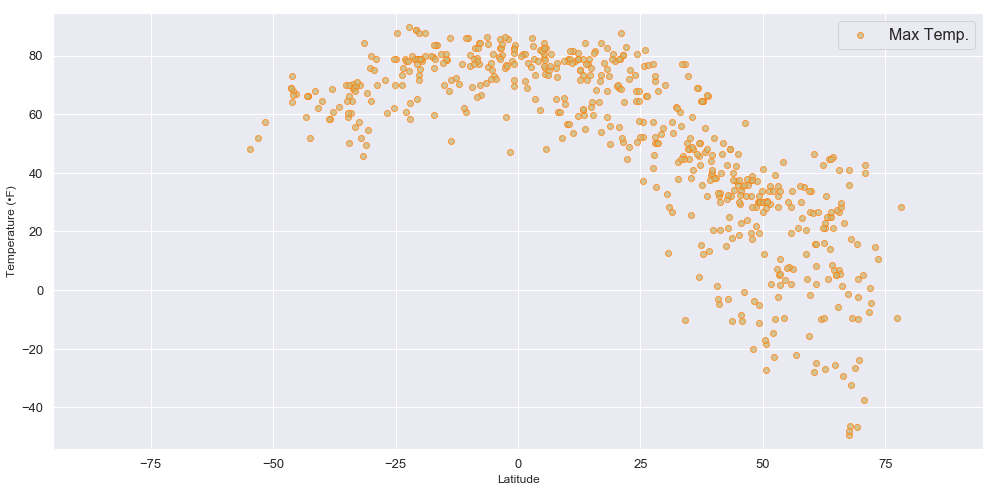

In [29]:
import seaborn as sns
sns.set()

# x: lat , y: temp
x= weather_data['Lat']
y= weather_data['Max Temp.']
s= y*2
plt.figure(figsize=(14, 7), dpi= 72)

plt.scatter(x,y, marker='o', facecolors='y' ,edgecolors='tab:orange', alpha=0.75)
#gca=get current axis
plt.gca().set(xlim=(-95,95), 
              ylim=(min(weather_data['Max Temp.'])-5,max(weather_data['Max Temp.'])+5), 
              xlabel='Latitude', 
              ylabel='Temperature (•F)')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title='Temperature (F) vs. Latitude 12/13/2018'
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig("Images/CorrelationLatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

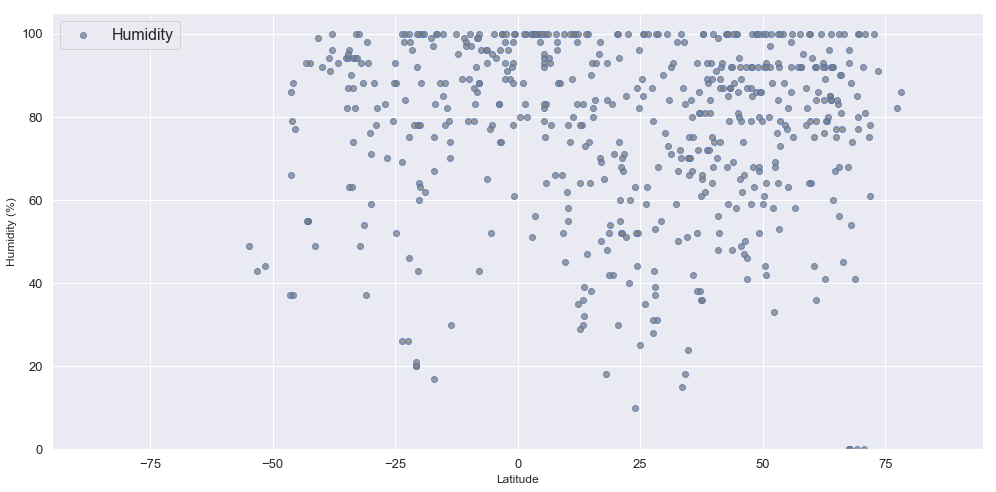

In [30]:
x= weather_data['Lat']
y= weather_data['Humidity']
s= y*10
plt.figure(figsize=(14, 7), dpi= 72)

plt.scatter(x,y, marker='o', facecolors='tab:gray' ,edgecolors='b', alpha=0.75)
#gca=get current axis
plt.gca().set(xlim=(-95,95), 
              ylim=(0,105), 
              xlabel='Latitude', 
              ylabel='Humidity (%)')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title='Humidity  vs. Latitude 12/13/2018' 
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig("Images/CorrelationLatVsHumidity.png")
plt.show()

 Latitude vs. Cloudiness Plot

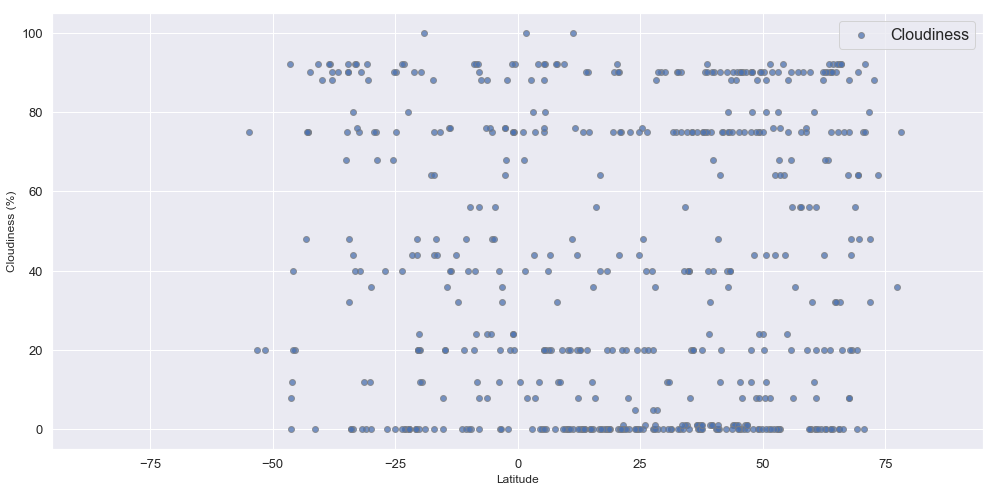

In [31]:
x= weather_data['Lat']
y= weather_data['Cloudiness']
s= y*10
plt.figure(figsize=(14, 7), dpi= 72)

plt.scatter(x,y, marker='o', facecolors='b' ,edgecolors='tab:gray', alpha=0.75)
#gca=get current axis
plt.gca().set(xlim=(-95,95), 
              ylim=(-5,105), 
              xlabel='Latitude', 
              ylabel='Cloudiness (%)')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title='Cloudiness  vs. Latitude 12/13/2018' 
plt.tight_layout()
plt.savefig("Images/CorrelationLatVsCloud.png")
plt.legend(fontsize=16)
plt.show()

 Latitude vs. Wind Speed Plot

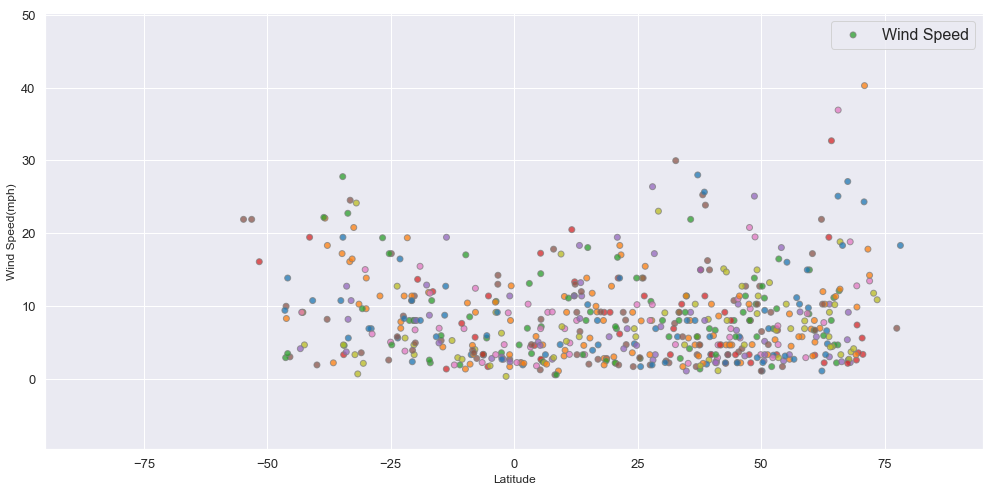

In [32]:
x= weather_data['Lat']
y= weather_data['Wind Speed']
s= y*10
plt.figure(figsize=(14, 7), dpi= 72)

plt.scatter(x,y, facecolors=colors ,edgecolors='tab:gray', alpha=0.75)
#gca=get current axis
plt.gca().set(xlim=(-95,95), 
              ylim=(min(weather_data['Wind Speed'])-10,max(weather_data['Wind Speed'])+10), 
              xlabel='Latitude', 
              ylabel='Wind Speed(mph)')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title='Wind Speed  vs. Latitude 12/13/2018'
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig("Images/CorrelationLatVsWindSpeed.png")
plt.show()

In [39]:
# Additional computations to plot wind speed vs/latitude using markers to indicate wind direction.
# Each cardinal direction uses a single marker and color. 
#wdds=[]
def getMarker(i):
    return "$"+markers[i% len(markers)]+"$"

def getColor(i):
    return colors[i% len(colors)]
  
for de in degs:
    d=int(d)
    if  (d > 337 or d < 22.5) and d>0:
        markers.append('\\rightarrow')
        colors.append('tab:blue')
      #  wdds.append('E')
    elif d >=22.5 and d <65:
        markers.append('\\nearrow')
        colors.append('tab:orange')
     #   wdds.append('NE')  
    elif d >=65 and d< 112.5:
        markers.append('\\uparrow')
        colors.append('tab:green')
     #   wdds.append('N')
    elif d >=112.5 and d < 157.5:
        markers.append('\\nwarrow')
        colors.append('tab:red')
      #  wdds.append('NW')
    elif d >=157.5 and d < 202.5:
        markers.append('\\leftarrow')
        colors.append('tab:purple')
     #   wdds.append('W')
    elif d >=202.5 and d < 247.5:
        markers.append('\\swarrow')
        colors.append('tab:brown')
     #   wdds.append('SW')
    elif d >=247.5 and d < 292.5:
        markers.append('\\downarrow')
        colors.append('tab:pink')
      #  wdds.append('S')
    elif d >=292.5 and d < 337:
        markers.append('\\searrow')
        colors.append('tab:olive')
      #  wdds.append('SE')
   # else:
     #   wdds.append('-')



In [40]:
#weather_data['Wind Cardinality']=wdds
#weather_data.head(12)

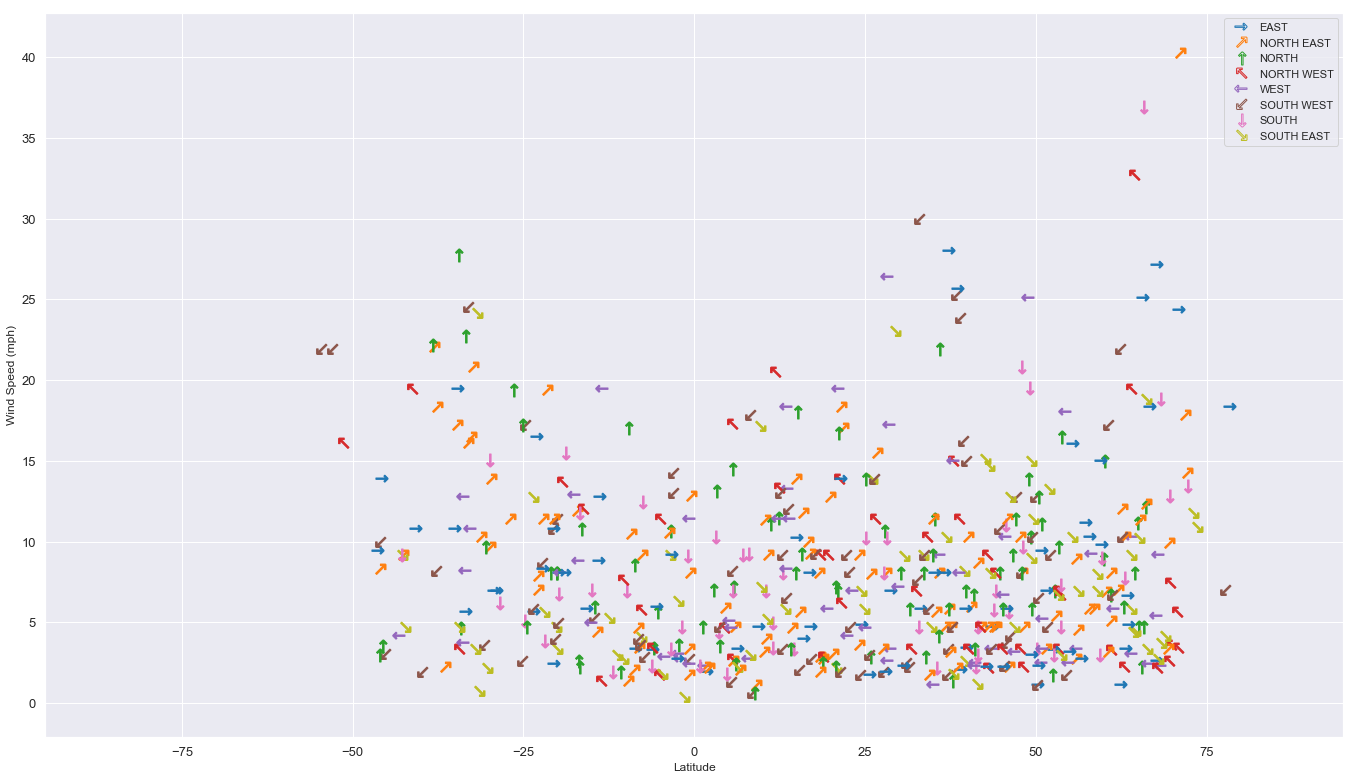

In [43]:
import matplotlib.lines as mlines  #for legend Custom handler

x= weather_data['Lat']
y= weather_data['Wind Speed']
s= y*10
plt.figure(figsize=(19, 11), dpi= 72)

for c, value in enumerate(wdds):
    plt.plot(x[c],y[c], marker=getMarker(c), c=getColor(c), markersize=13)
	
#gca=get current axis
plt.gca().set(xlim=(-95,95), 
              ylim=(min(weather_data['Wind Speed']-2.5),max(weather_data['Wind Speed']+2.5)), 
              xlabel='Latitude', 
              ylabel='Wind Speed (mph)')
			  
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title='Wind Speed vs. Latitude'

east= mlines.Line2D([], [], color='tab:blue', marker=r'$\rightarrow$', markersize=13, label='EAST', fillstyle='none', linewidth=0 )
neast= mlines.Line2D([], [], color='tab:orange', marker=r'$\nearrow$', markersize=13, label='NORTH EAST', fillstyle='none', linewidth=0 )
north= mlines.Line2D([], [], color='tab:green', marker=r'$\uparrow$', markersize=13, label='NORTH', fillstyle='none', linewidth=0 )
nwest= mlines.Line2D([], [], color='tab:red', marker=r'$\nwarrow$', markersize=13, label='NORTH WEST', fillstyle='none', linewidth=0 )
west= mlines.Line2D([], [], color='tab:purple', marker=r'$\leftarrow$', markersize=13, label='WEST', fillstyle='none', linewidth=0 )
swest= mlines.Line2D([], [], color='tab:brown', marker=r'$\swarrow$', markersize=13, label='SOUTH WEST', fillstyle='none', linewidth=0 )
south= mlines.Line2D([], [], color='tab:pink', marker=r'$\downarrow$', markersize=13, label='SOUTH', fillstyle='none', linewidth=0 )
seast= mlines.Line2D([], [], color='tab:olive', marker=r'$\searrow$', markersize=13, label='SOUTH EAST', fillstyle='none', linewidth=0 )

plt.legend(handles=[east,neast,north,nwest,west,swest,south,seast])
plt.tight_layout()
plt.savefig("Images/CorrelationLatVsWindSpeedwDir.png")
plt.show()


### OBSERVABLE TRENDS:



Note: There will always be high data values above -40deg  latitude,  because most of the population is above this line.

1 - There is a clear correlation between latitude and temperature,
High latitud areas are the only areas with temperatures under 0deg, as the latitude decreases so does the temperature increase. The highest temperatures are around latitude 0 +- 25 degrees.
So the plot confirms that the highest temperatures are around the equator where latitude is 0.

2- Humidity is not related to Latitude,  high Humidity values range from -50 to 75 deg. Latitude.

3- I included a wind speed plot that also indicates wind direction, there is no relation between wind speed and Latitude, or wind direction and latitude.